Movie popularity based system targeted new customer

In [5]:
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [6]:
data=pd.read_csv('movieratings.csv')
data.head(15)

,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Gladiator,2000,8.5,67.0,1187559
1,1,Memento,2000,8.5,80.0,1014199
2,2,Snatch,2000,8.3,NaN,707162
3,3,Requiem for a Dream,2000,8.3,68.0,688394
4,4,X-Men,2000,7.4,64.0,526411
5,5,Cast Away,2000,7.8,73.0,465125
6,6,American Psycho,2000,7.6,64.0,422475
7,7,Unbreakable,2000,7.3,62.0,335334
8,8,Meet the Parents,2000,7.0,73.0,290126
9,9,Mission: Impossible II,2000,6.1,NaN,286465


In [7]:
data=data.dropna()

In [18]:
data.rename( columns={'Unnamed: 0':'Id'}, inplace=True )

In [19]:
data.head(10)

,Id,movie,year,imdb,metascore,votes
0,0,Gladiator,2000,8.5,67.0,1187559
1,1,Memento,2000,8.5,80.0,1014199
3,3,Requiem for a Dream,2000,8.3,68.0,688394
4,4,X-Men,2000,7.4,64.0,526411
5,5,Cast Away,2000,7.8,73.0,465125
6,6,American Psycho,2000,7.6,64.0,422475
7,7,Unbreakable,2000,7.3,62.0,335334
8,8,Meet the Parents,2000,7.0,73.0,290126
10,10,"O Brother, Where Art Thou?",2000,7.8,69.0,261119
12,12,Wo hu cang long,2000,7.9,93.0,237498


In [20]:
data.shape

(950, 6)

In [11]:
popular_movie = pd.DataFrame(data.groupby('movie')['imdb'].mean())
most_popular = popular_movie.sort_values('imdb', ascending=False)
most_popular.head(30)


,imdb
movie,
The Dark Knight,9.0
The Lord of the Rings: The Return of the King,8.9
The Lord of the Rings: The Fellowship of the Ring,8.8
Inception,8.8
The Lord of the Rings: The Two Towers,8.7
Cidade de Deus,8.6
Sen to Chihiro no kamikakushi,8.6
Interstellar,8.6
The Pianist,8.5


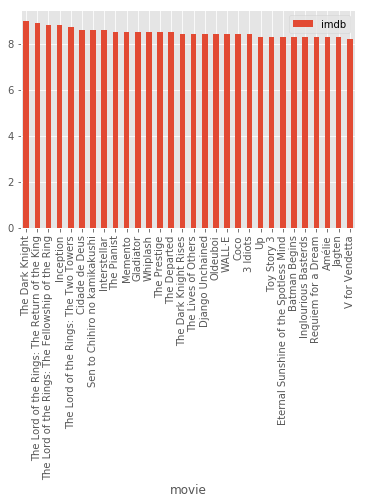

In [12]:
most_popular.head(30).plot(kind = "bar")

10 most popular movie at netflix

In [13]:
most_popular.head(10)

,imdb
movie,
The Dark Knight,9.0
The Lord of the Rings: The Return of the King,8.9
The Lord of the Rings: The Fellowship of the Ring,8.8
Inception,8.8
The Lord of the Rings: The Two Towers,8.7
Cidade de Deus,8.6
Sen to Chihiro no kamikakushi,8.6
Interstellar,8.6
The Pianist,8.5
